# Kod do wygenerownia i porównania różnych modeli klasyfikacji (Różne miary)

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
np.random.seed = 42

In [185]:
# Wczytanie danych
train_data = pd.read_csv("train_data_with_features.csv")
test_data = pd.read_csv("test_data_with_features.csv")

In [186]:
# Przygotowanie cech i etykiet
y_train = train_data['class']
X_train = train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)
y_test = test_data['class']
X_test = test_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"], axis=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [187]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Zakodowanie etykiet w sposób jednolity
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)  

    # Trening modelu
    model.fit(X_train, y_train_encoded)
    
    # Predykcja na zbiorze treningowym i testowym
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Dokładności
    train_acc = accuracy_score(y_train_encoded, y_train_pred)
    test_acc = accuracy_score(y_test_encoded, y_test_pred)

    # Raporty klasyfikacji
    train_report = classification_report(y_train_encoded, y_train_pred, target_names=label_encoder.classes_.tolist())
    test_report = classification_report(y_test_encoded, y_test_pred, target_names=label_encoder.classes_.tolist())

    # Precision, Recall, F1 score
    train_precision = precision_score(y_train_encoded, y_train_pred, average='weighted')
    train_recall = recall_score(y_train_encoded, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train_encoded, y_train_pred, average='weighted')

    test_precision = precision_score(y_test_encoded, y_test_pred, average='weighted')
    test_recall = recall_score(y_test_encoded, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test_encoded, y_test_pred, average='weighted')

    # Macierze pomyłek
    train_cm = confusion_matrix(y_train_encoded, y_train_pred)
    test_cm = confusion_matrix(y_test_encoded, y_test_pred)

    # Wypisanie wyników
    print(f"\n📊 Dokładność (trening): {train_acc:.4f}")
    print(f"Precision (trening): {train_precision:.4f}")
    print(f"Recall (trening): {train_recall:.4f}")
    print(f"F1 Score (trening): {train_f1:.4f}")
    print("Raport klasyfikacji (trening):\n", train_report)

    print(f"\n📊 Dokładność (test): {test_acc:.4f}")
    print(f"Precision (test): {test_precision:.4f}")
    print(f"Recall (test): {test_recall:.4f}")
    print(f"F1 Score (test): {test_f1:.4f}")
    print("Raport klasyfikacji (test):\n", test_report)

    # Wizualizacja macierzy pomyłek
    plt.figure(figsize=(12, 6))

    # Macierz pomyłek dla zbioru treningowego
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Trening")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Macierz pomyłek dla zbioru testowego
    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Macierz Pomyłek - Test")
    plt.xlabel("Przewidywania")
    plt.ylabel("Rzeczywiste")

    # Wyświetlenie wykresu
    plt.tight_layout()
    plt.show()


## SoftVote Weights

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression( max_iter=1000)
estimators=[('DecisionTree', model1), ('KNN', model2), ('LR', model3)]


📊 Dokładność (trening): 0.9814
Precision (trening): 0.9820
Recall (trening): 0.9814
F1 Score (trening): 0.9815
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.97      0.95      0.96       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       0.99      1.00      0.99       297
             God Wal       0.93      0.98      0.95       430
          Hirva Lamb       1.00      0.99      0.99       296
            Kadu wal       0.95      0.98      0.97       428
            Kala Wal       1.00      1.00      1.00       298
     Lal lamb shenga       0.98      0.99      0.99       296
Lamb Shiracha Ghevda       1.00      0.99      1.00       300
      Shravan Ghevda       1.00      0.94      0.97       300
          Tambda wal       1.00      1.00      1.00       300
       Vatana Ghevda       1.00      0.96      0.98       360

            accuracy                           0

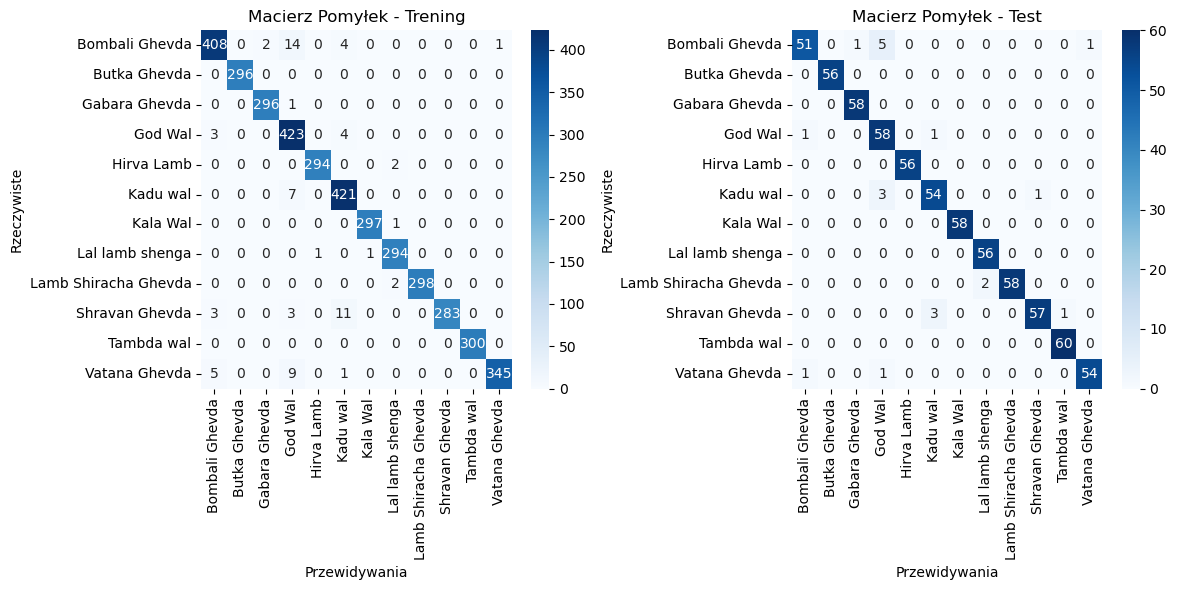

In [199]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
model_soft = VotingClassifier(estimators=estimators, voting='soft', weights=[0.15, 0.65, 0.20])

evaluate_model(model_soft, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 1.0000
Precision (trening): 1.0000
Recall (trening): 1.0000
F1 Score (trening): 1.0000
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       1.00      1.00      1.00       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       1.00      1.00      1.00       297
             God Wal       1.00      1.00      1.00       430
          Hirva Lamb       1.00      1.00      1.00       296
            Kadu wal       1.00      1.00      1.00       428
            Kala Wal       1.00      1.00      1.00       298
     Lal lamb shenga       1.00      1.00      1.00       296
Lamb Shiracha Ghevda       1.00      1.00      1.00       300
      Shravan Ghevda       1.00      1.00      1.00       300
          Tambda wal       1.00      1.00      1.00       300
       Vatana Ghevda       1.00      1.00      1.00       360

            accuracy                           1

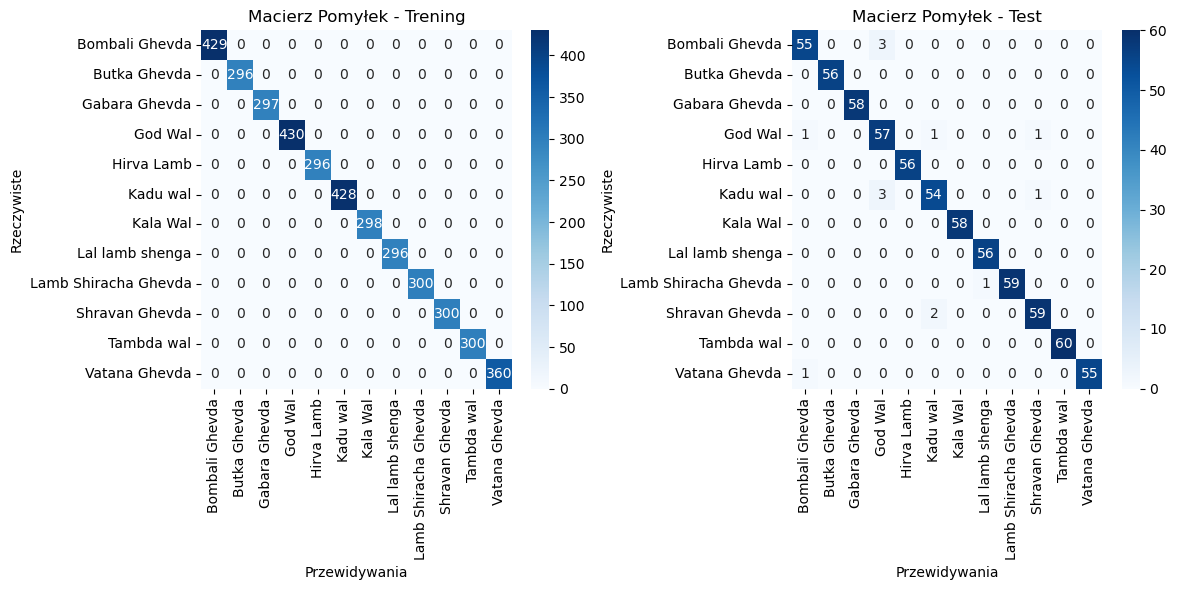

In [208]:
from sklearn.model_selection import GridSearchCV
# MODEL NAJLEPSZY
# Parametry dla DecisionTree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20, 30, 40],
    'min_samples_leaf': [1, 5, 10, 15, 20]
}

# Parametry dla KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Parametry dla LogisticRegression
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Tworzenie obiektów GridSearch dla każdego modelu
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='accuracy')
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_param_grid, cv=5, scoring='accuracy')

# Dopasowanie modeli
dt_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)

# Uzyskanie najlepszych parametrów
best_dt = dt_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_lr = lr_grid.best_estimator_


model_soft = VotingClassifier(estimators=[('DecisionTree', best_dt), 
                                          ('KNN', best_knn), 
                                          ('LR', best_lr)], 
                              voting='soft', 
                              weights=[0.15, 0.70, 0.15])

evaluate_model(model_soft, X_train, X_test, y_train, y_test)

## Stacking

In [139]:
from sklearn.ensemble import StackingClassifier


📊 Dokładność (trening): 0.9538
Precision (trening): 0.9541
Recall (trening): 0.9538
F1 Score (trening): 0.9538
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.90      0.88      0.89       429
        Butka Ghevda       1.00      1.00      1.00       296
       Gabara Ghevda       0.99      1.00      0.99       297
             God Wal       0.87      0.88      0.88       430
          Hirva Lamb       0.99      0.98      0.98       296
            Kadu wal       0.94      0.98      0.96       428
            Kala Wal       0.95      0.95      0.95       298
     Lal lamb shenga       0.92      0.91      0.92       296
Lamb Shiracha Ghevda       0.97      0.99      0.98       300
      Shravan Ghevda       1.00      0.94      0.97       300
          Tambda wal       1.00      1.00      1.00       300
       Vatana Ghevda       0.99      0.98      0.98       360

            accuracy                           0

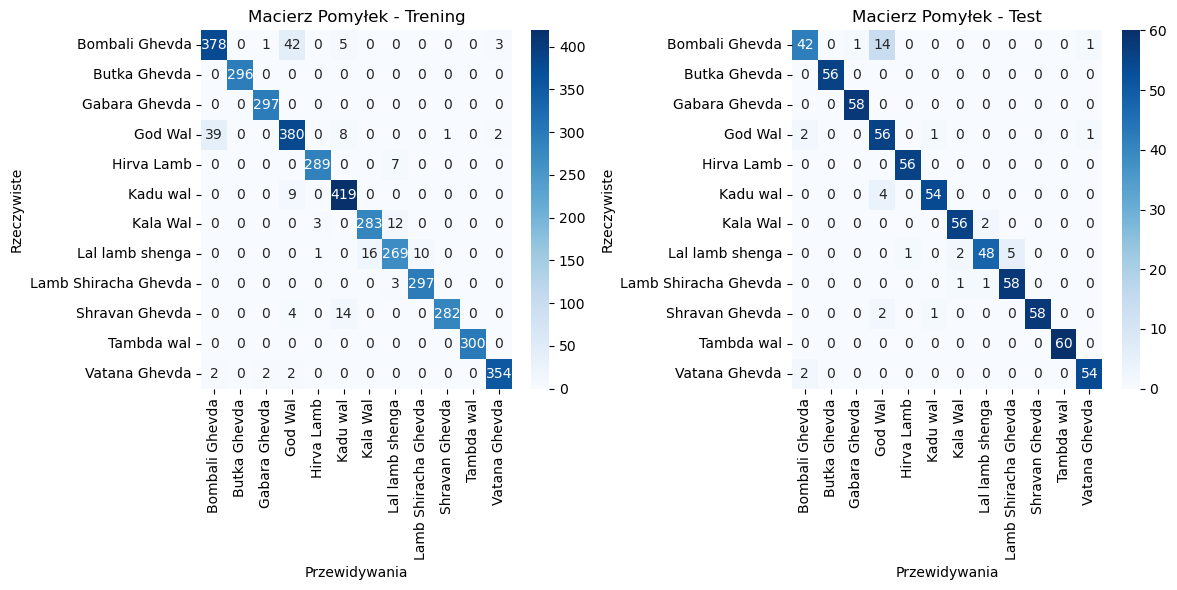

In [140]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Bootstrap Aggregating

In [141]:
from sklearn.ensemble import BaggingClassifier


📊 Dokładność (trening): 0.8883
Precision (trening): 0.8899
Recall (trening): 0.8883
F1 Score (trening): 0.8882
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.82      0.77      0.80       429
        Butka Ghevda       0.96      1.00      0.98       296
       Gabara Ghevda       0.96      0.96      0.96       297
             God Wal       0.76      0.83      0.79       430
          Hirva Lamb       0.89      0.80      0.84       296
            Kadu wal       0.89      0.96      0.92       428
            Kala Wal       0.86      0.89      0.87       298
     Lal lamb shenga       0.86      0.87      0.86       296
Lamb Shiracha Ghevda       0.91      0.93      0.92       300
      Shravan Ghevda       1.00      0.89      0.94       300
          Tambda wal       0.99      1.00      0.99       300
       Vatana Ghevda       0.86      0.82      0.84       360

            accuracy                           0

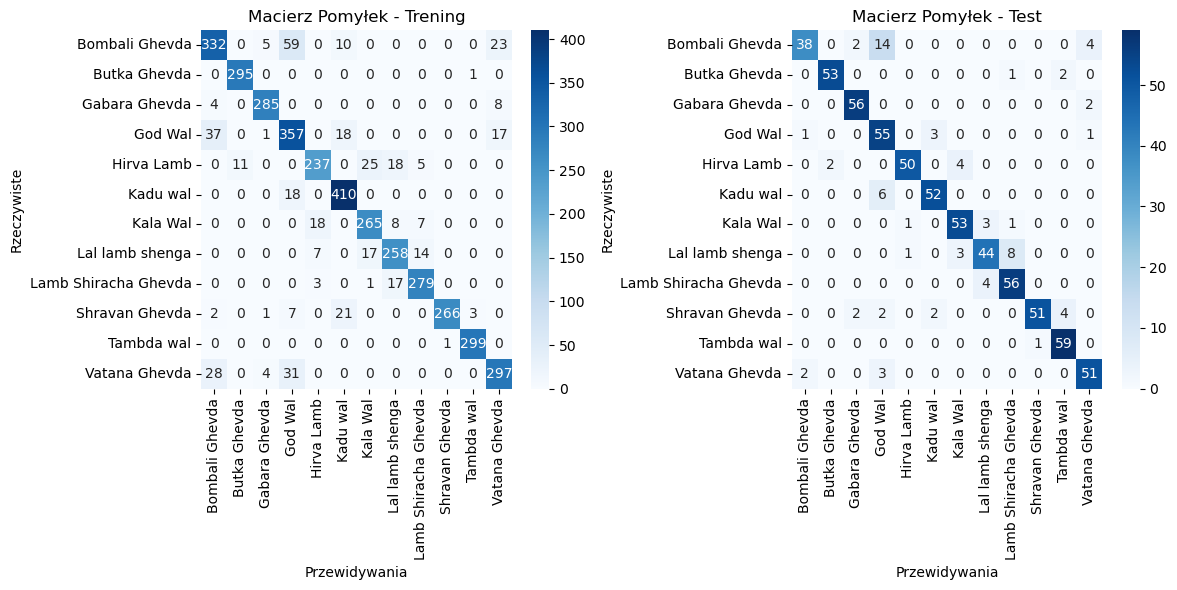

In [142]:
clf = BaggingClassifier(estimator=model3,
                        n_estimators=10)

evaluate_model(clf, X_train, X_test, y_train, y_test)

## Gradient Boosting


📊 Dokładność (trening): 0.8672
Precision (trening): 0.8719
Recall (trening): 0.8672
F1 Score (trening): 0.8674
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.83      0.69      0.75       429
        Butka Ghevda       0.92      0.92      0.92       296
       Gabara Ghevda       0.98      0.87      0.92       297
             God Wal       0.70      0.82      0.76       430
          Hirva Lamb       0.85      0.91      0.88       296
            Kadu wal       0.84      0.97      0.90       428
            Kala Wal       0.95      0.90      0.92       298
     Lal lamb shenga       0.81      0.83      0.82       296
Lamb Shiracha Ghevda       0.86      0.83      0.85       300
      Shravan Ghevda       0.96      0.90      0.93       300
          Tambda wal       0.98      0.98      0.98       300
       Vatana Ghevda       0.87      0.85      0.86       360

            accuracy                           0

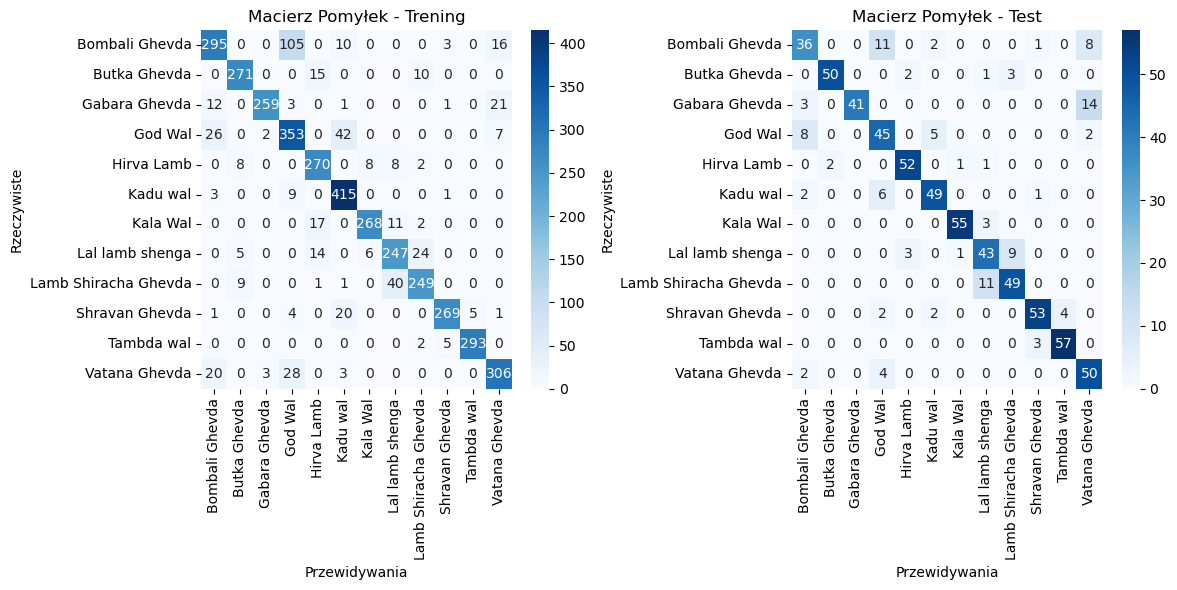

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=1,
                                  learning_rate=0.01) # Szybkość "uczenia" się 

evaluate_model(model, X_train, X_test, y_train, y_test)


📊 Dokładność (trening): 0.9171
Raport klasyfikacji (trening):
                       precision    recall  f1-score   support

      Bombali Ghevda       0.86      0.71      0.78       295
        Butka Ghevda       0.95      0.97      0.96       292
       Gabara Ghevda       0.96      0.97      0.96       293
             God Wal       0.76      0.86      0.81       298
          Hirva Lamb       0.97      0.91      0.94       292
            Kadu wal       0.89      0.98      0.93       292
            Kala Wal       0.97      0.96      0.96       295
     Lal lamb shenga       0.85      0.93      0.89       292
Lamb Shiracha Ghevda       0.93      0.89      0.91       298
      Shravan Ghevda       0.99      0.93      0.96       299
          Tambda wal       1.00      0.99      0.99       298
       Vatana Ghevda       0.92      0.92      0.92       292

            accuracy                           0.92      3536
           macro avg       0.92      0.92      0.92      3536
    

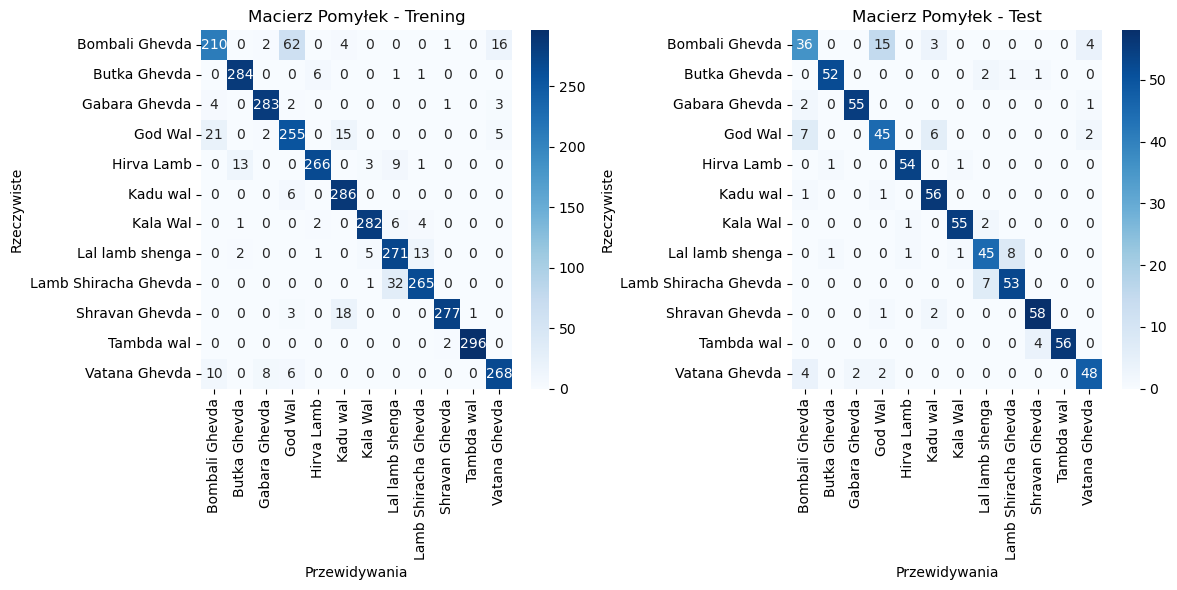

In [42]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Inicjalizacja LabelEncoder
label_encoder = LabelEncoder()

# Zakodowanie etykiet na liczby
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Inicjalizacja modelu XGBClassifier
model = XGBClassifier(random_state=1,
                      learning_rate=0.01, 
                      booster='gbtree', 
                      max_depth=4)


evaluate_model(model, X_train, X_test, y_train, y_test)

In [145]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [146]:
# przygotowanie stacking
def get_stacking():
    
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('cart', DecisionTreeClassifier(random_state=1)))
    level0.append(('rf', RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)))
    level0.append(('aboost', AdaBoostClassifier(random_state=1)))
    level0.append(('gboost', GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)))
    level0.append(('xgb', XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    # definicja meta learner model
    level1 = LogisticRegression()
    
    # definicja stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    
    return model

In [147]:
# lista modeli
def get_models():
    
    models = dict()
    models['lr'] = LogisticRegression()
    models['cart'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier(n_estimators=1000, # Ilość słabych estymatorów
                                      max_depth=2, # Maksymalna wysokość drzewa w słabym estymatorze
                                      min_samples_split = 2, # Minimalna ilość obserwacji wymagana do podziału węzła
                                      max_features = 3, # Maksymalna ilość zmiennych brana pod uwagę przy podziale węzła
                                      random_state=0,
                                      n_jobs = -1)
    models['aboost'] = AdaBoostClassifier(random_state=1)
    models['gboost'] = GradientBoostingClassifier(random_state=1,
                                      learning_rate=0.01)
    models['xgb'] = XGBClassifier(random_state=1,
                        learning_rate=0.01, # Szybkość "uczenia" się
                        booster='gbtree', # Jaki model wykorzystujemy (drzewo - gbtree, liniowe - gblinear)
                        max_depth=4 # Maksymalna głębokość drzewa 
                        )
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()

    return models

In [148]:
# ocena modeli przy wykorzystaniu cross-validation
def evaluate_model(model, X, y):
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

    return scores


### uwaga! może zająć dużo czasu

In [149]:
# modele do evaluacji
models = get_models()

# Zakodowanie etykiet na liczby
y_encoded = label_encoder.fit_transform(y_test)
X=X_test

# ocena modeli
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y_encoded)
    results.append(scores)
    names.append(name)
    print('%8s mean-%.3f std-%.3f' % (name, np.mean(scores), np.std(scores)))

NameError: name 'AdaBoostClassifier' is not defined

In [ ]:
# plot acc dla modeli i stacking
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Do sprawdzenia istotności cech

In [ ]:
clf = RandomForestClassifier(n_estimators=100,  max_depth=7)
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Dokładność modelu: {accuracy:.4f}")
print("Raport klasyfikacji:\n", report)

In [ ]:
import seaborn as sns
# Tworzymy DataFrame z istotnościami
feature_importance = pd.DataFrame({
    'Feature': train_data.drop(['class', "path", "filename", "R", "G", "B", "brightness"],axis=1).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Wykres
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Istotność cech według Random Forest')
plt.tight_layout()
plt.show()